In [48]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

In [49]:
url = 'https://www.formula1.com/en/results.html/2023/drivers.html'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [50]:
table = soup.find_all('table', class_='resultsarchive-table')

In [51]:
table = [i.text.strip() for i in table]

In [52]:
header = soup.find('thead').text.strip().split('\n')

In [53]:
header = soup.find('thead').text.strip().split('\n')

In [54]:
df = pd.DataFrame(columns=header)

In [55]:
df

,Pos,Driver,Nationality,Car,PTS


In [56]:
table2 = soup.find_all('tr')

In [57]:
for z in table2[1:]:
    row_data=z.find_all('td')
    data = [x.text.strip().replace('\n', ' ') for x in row_data if x!='']
    data = [item for item in data if item != '']
    length = len(df)
    df.loc[length] = data

In [58]:
df.set_index('Pos', inplace=True)

In [59]:
df

,Driver,Nationality,Car,PTS
Pos,,,,
1,Max Verstappen VER,NED,Red Bull Racing Honda RBPT,575
2,Sergio Perez PER,MEX,Red Bull Racing Honda RBPT,285
3,Lewis Hamilton HAM,GBR,Mercedes,234
4,Fernando Alonso ALO,ESP,Aston Martin Aramco Mercedes,206
5,Charles Leclerc LEC,MON,Ferrari,206
6,Lando Norris NOR,GBR,McLaren Mercedes,205
7,Carlos Sainz SAI,ESP,Ferrari,200
8,George Russell RUS,GBR,Mercedes,175
9,Oscar Piastri PIA,AUS,McLaren Mercedes,97


In [60]:
df['PTS'] = pd.to_numeric(df['PTS'])

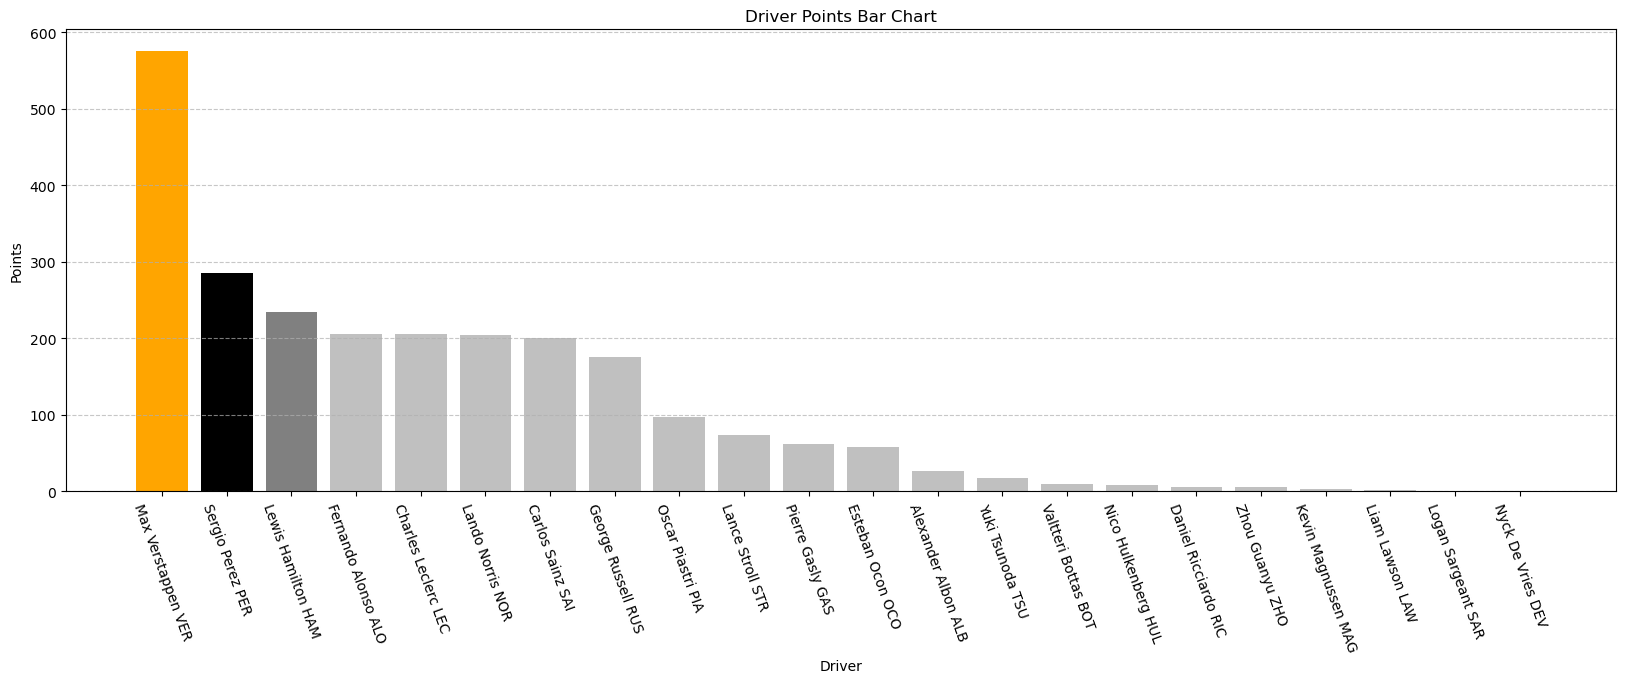

In [61]:
df = df.sort_values(by='PTS', ascending=False)

# Set the figsize to make the plot wider
plt.figure(figsize=(20, 6))

# Create a bar chart with different colors for the first three bars
plt.bar(df['Driver'][:3], df['PTS'][:3], color=['orange', 'black', 'grey'])

# Set the color grey for the remaining bars
plt.bar(df['Driver'][3:], df['PTS'][3:], color='silver')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=-70)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Driver')
plt.ylabel('Points')
plt.title('Driver Points Bar Chart')

# Show the plot
plt.show()